### Draws the occurrences distribution per year, boxplot & histogram

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
fig_p = "../../figures/"

### I. Input data

In [3]:
extract_ref = "../../data/occurrences/extraction_ref_sample300.csv"

# read the extraction ref .csv file
ref_df = pd.read_csv(extract_ref, sep=' ')
# Convert columns types to best suited types
ref_df = ref_df.convert_dtypes()

In [4]:
print(ref_df.shape)
ref_df.tail(10)

(300, 45)


id                                       occurrenceid  \
290   462046568                                               <NA>   
291   462046572                                               <NA>   
292   462046573                                               <NA>   
293   462046575                                               <NA>   
294   462046576                                               <NA>   
295   462046578                                               <NA>   
296   462046579                                               <NA>   
297   462046583                                               <NA>   
298   462046584                                               <NA>   
299  2005314736  https://www.inaturalist.org/observations/20280053   

          family taxonrank         scientificname countrycode       locality  \
290  Orchidaceae   SPECIES  Liparis bowkeri Harv.          ZA  Not available   
291  Orchidaceae   SPECIES  Liparis bowkeri Harv.          ZA  Not available   
292  Orchidaceae   SPECIES  Liparis bowkeri Harv.          ZA  Not available   
293  Orchidaceae   SPECIES  Liparis bowkeri Harv.          ZA  Not available   
294  Orchidaceae   SPECIES  Liparis bowkeri Harv.          ZA  Not available   
295  Orchidaceae   SPECIES  Liparis bowkeri Harv.          ZA  Not available   
296  Orchidaceae   SPECIES  Liparis bowkeri Harv.          ZA  Not available   
297  Orchidaceae   SPECIES  Liparis bowkeri Harv.          ZA  Not available   
298  Orchidaceae   SPECIES  Liparis bowkeri Harv.          ZA  Not available   
299  Orchidaceae   SPECIES  Liparis bowkeri Harv.          ZA           <NA>   

     individualcount occurrencestatus  coordinateuncertaintyinmeters  ...  \
290             <NA>             <NA>                           <NA>  ...   
291             <NA>             <NA>                           <NA>  ...   
292             <NA>             <NA>                           <NA>  ...   
293             <NA>             <NA>                           <NA>  ...   
294             <NA>             <NA>                           <NA>  ...   
295             <NA>             <NA>                           <NA>  ...   
296             <NA>             <NA>                           <NA>  ...   
297             <NA>             <NA>                           <NA>  ...   
298             <NA>             <NA>                           <NA>  ...   
299             <NA>             <NA>                           12.0  ...   

     prod_10_2020  flag_10_2020 prod_11_2020 flag_11_2020 prod_12_2020  \
290          <NA>          <NA>         <NA>         <NA>         <NA>   
291          <NA>          <NA>         <NA>         <NA>         <NA>   
292          <NA>          <NA>         <NA>         <NA>         <NA>   
293          <NA>          <NA>         <NA>         <NA>         <NA>   
294          <NA>          <NA>         <NA>         <NA>         <NA>   
295          <NA>          <NA>         <NA>         <NA>         <NA>   
296          <NA>          <NA>         <NA>         <NA>         <NA>   
297          <NA>          <NA>         <NA>         <NA>         <NA>   
298          <NA>          <NA>         <NA>         <NA>         <NA>   
299          <NA>          <NA>         <NA>         <NA>         <NA>   

    flag_12_2020 prod_01_2021 flag_01_2021  prod_02_2021  flag_02_2021  
290         <NA>         <NA>         <NA>          <NA>          <NA>  
291         <NA>         <NA>         <NA>          <NA>          <NA>  
292         <NA>         <NA>         <NA>          <NA>          <NA>  
293         <NA>         <NA>         <NA>          <NA>          <NA>  
294         <NA>         <NA>         <NA>          <NA>          <NA>  
295         <NA>         <NA>         <NA>          <NA>          <NA>  
296         <NA>         <NA>         <NA>          <NA>          <NA>  
297         <NA>         <NA>         <NA>          <NA>          <NA>  
298         <NA>         <NA>         <NA

### II. Some statistics

In [5]:
years = ref_df.dropna(subset=['year'])
print(years.shape)

Nb_NA = len(ref_df) - len(years)

print("Number of occurrencez without a year provided:", Nb_NA, ", i.e.:", Nb_NA/len(ref_df)*100)

(258, 45)
Number of occurrencez without a year provided: 42 , i.e.: 14.000000000000002


In [6]:
print("Occurrence dates: statistics")

print("Mean  :", years.year.mean())
print("Min   :", years.year.min())
print("Max   :", years.year.max())
print()
print("Q1    :", years.year.quantile(0.25))
print("Median:", years.year.median())
print("Q3    :", years.year.quantile(0.75))
print()

print("std   :", years.year.std())

Occurrence dates: statistics
Mean  : 1971.4651162790697
Min   : 1902
Max   : 2019

Q1    : 1944.0
Median: 1979.0
Q3    : 1997.75

std   : 31.022032213754976


### III. Boxplot

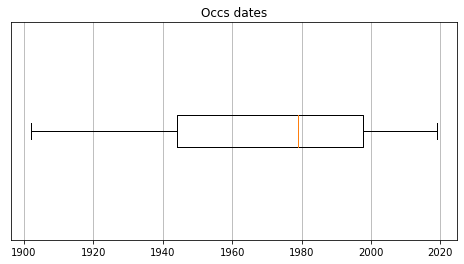

In [7]:
plt.figure(figsize=(8,4))
plt.title("Occs dates", size=12)
plt.boxplot(years.year, vert=False)
plt.grid(True)
plt.gca().yaxis.set_visible(False) # Hide only x axis

# plt.savefig(os.path.join(fig_p, "boxplot_default.png"), bbox_inches='tight')

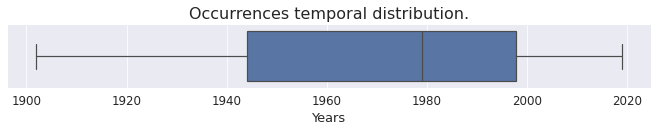

In [8]:
sns.set(context='paper', font_scale=1.35)

ax = sns.catplot(x="year", kind="box", data=years)
plt.gca().grid(True)
ax.fig.set_size_inches(10,1)
ax.set(xlabel="Years")

plt.gca().set_title("Occurrences temporal distribution.", size=16)
plt.gca().yaxis.set_visible(False)

# plt.savefig(os.path.join(fig_p, "boxplot_default2.png"), bbox_inches='tight')

### IV. Histogram

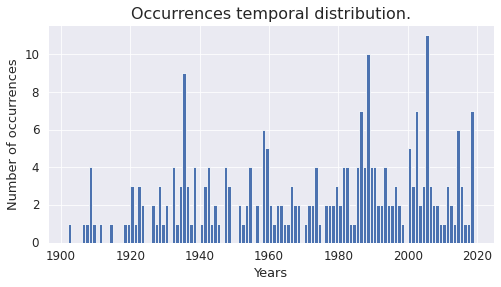

In [9]:
x = years.year 

f, ax = plt.subplots(1,1,figsize=(8,4))

# # histogram on linear scale
hist, bins, _ = plt.hist(x, bins=years.year.max() - years.year.min())

plt.xlabel("Years")
plt.ylabel("Number of occurrences")
plt.title("Occurrences temporal distribution.", size=16)

plt.savefig(os.path.join(fig_p, "distr_default_side_by_side.png"), bbox_inches='tight')

14.6% (145,641 /999,407) without dates.